In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

 # Local Methods in High Dimensions
## High-Dimensional Prediction Challenges

We have examined two learning techniques for prediction so far: the stable but biased linear model and the less stable but apparently less biased class of k-nearest-neighbor estimates. It would seem that with a reasonably large set of training data, we could always approximate the theoretically optimal conditional expectation by k-nearest-neighbor averaging, since we should be able to find a fairly large neighborhood of observations close to any \( x \) and average them. This approach and our intuition breaks down in high dimensions, and the phenomenon is commonly referred to as the curse of dimensionality (Bellman, 1961). 

![cube](1.8.png)

FIGURE 1.8. The curse of dimensionality is well illustrated by a subcubical neighborhood for uniform data in a unit cube. The ﬁgure on the right shows the side-length of the subcube needed to capture a fraction r of the volume of the data, for diﬀerent dimensions p. In ten dimensions we need to cover 80% of the range of each coordinate to capture 10% of the data.
### Curse of Dimensionality

Consider the nearest-neighbor procedure for inputs uniformly distributed in a \( p \)-dimensional unit hypercube. Suppose we send out a hypercubical neighborhood about a target point to capture a fraction \( r \) of the observations. Since this corresponds to a fraction \( r \) of the unit volume, the expected edge length will be 

$$
e_p(r) = r^{1/p}
$$

For example, in ten dimensions:

- $ e_{10}(0.01) = 0.63 $
- $ e_{10}(0.1) = 0.80 $

while the entire range for each input is only 1.0. So to capture 1% or 10% of the data to form a local average, we must cover 63% or 80% of the range of each input variable. Such neighborhoods are no longer “local.” Reducing \( r \) dramatically does not help much either, since the fewer observations we average, the higher the variance of our fit.

Another consequence of the sparse sampling in high dimensions is that all sample points are close to an edge of the sample. Consider \( N \) data points uniformly distributed in a \( p \)-dimensional unit ball centered at the origin. Suppose we consider a nearest-neighbor estimate at the origin. The median distance from the origin to the closest data point is given by:

$$
d(p, N) = \left(1 - \frac{1}{N}\right)^{1/p}
$$

For \( N = 500 \) and \( p = 10 \):

$$
d(10, 500) \approx 0.52
$$

Hence, most data points are closer to the boundary of the sample space than to any other data point. The reason this presents a problem is that prediction is much more difficult near the edges of the training sample. One must extrapolate from neighboring sample points rather than interpolate between them.

Another manifestation of the curse is that the sampling density is proportional to $ N^{1/p} $, where $ p $ is the dimension of the input space and $ N $ is the sample size. Thus, if $ N_1 = 100 $ represents a dense sample for a single input problem, then $ N_{10} = 100^{10} $ is the sample size required for the same sampling density with 10 inputs. Thus, in high dimensions, all feasible training samples sparsely populate the input space.

### Example with Nearest-Neighbor Rule

Suppose we have 1000 training examples $ x_i $ generated uniformly on $[-1, 1]^p$. Assume that the true relationship between $ X $ and $ Y $ is:

$$
Y = f(X) = e^{-8 \|X\|^2}
$$

without any measurement error. We use the 1-nearest-neighbor rule to predict $ y_0 $ at the test-point $ x_0 = 0 $. The expected prediction error at $ x_0 $ for our procedure can be computed as the mean squared error (MSE) for estimating $ f(0) $:

$$
\text{MSE}(x_0) = \mathbb{E}_T \left[f(x_0) - \hat{y}_0 \right]^2
= \mathbb{E}_T \left[\hat{y}_0 - \mathbb{E}_T (\hat{y}_0)\right]^2 + \left[\mathbb{E}_T (\hat{y}_0) - f(x_0)\right]^2
= \text{Var}_T (\hat{y}_0) + \text{Bias}^2 (\hat{y}_0)
$$

Figure 1.7 illustrates the setup. We have broken down the MSE into two components that will become familiar as we proceed: variance and squared bias. This decomposition is known as the bias–variance decomposition. 

In low dimensions and with \( N = 1000 \), the nearest neighbor is very close to 0, and so both the bias and variance are small. As the dimension increases, the nearest neighbor tends to stray further from the target point, and both bias and variance increase. By \( p = 10 \), for more than 99% of the samples, the nearest neighbor is a distance greater than 0.5 from the origin. Thus, as \( p \) increases, the estimate tends to be 0 more often than not, and hence the MSE levels off at 1.0, as does the bias, and the variance starts dropping.

### Linear Model Comparison

Suppose, on the other hand, that we know the relationship between \( Y \) and \( X \) is linear:

$$
Y = X^T \beta + \epsilon
$$

where $ \epsilon \sim \mathcal{N}(0, \sigma^2) $ and we fit the model by least squares to the training data. For an arbitrary test point $ x_0 $, we have:

$$
\hat{y}_0 = x_0^T \hat{\beta}
$$

which can be written as:

$$
\hat{y}_0 = x_0^T \beta + \sum_{i=1}^N l_i(x_0) \epsilon_i
$$

where $ l_i$($x_0$)  is the $ i $-th element of $ X (X^T X)^{-1} x_0 $. Under this model, the least squares estimates are generally more stable than those from non-parametric methods like k-nearest-neighbors in high dimensions.

![ccube](1.9.png)
FIGURE 1.10. A simulation example, demonstrating the curse of dimensional- ity and its eﬀect on MSE, bias and variance. The input features are uniformly distributed in [−1, 1]p for p = 1, . . . , 10 The top left panel shows the target function (no noise) in IR: f (X) = e−8||X|| , and demonstrates the error that 1-nearest neighbor makes in estimating f (0). The training point is indicated by the blue tick mark. The top right panel illustrates why the radius of the 1-nearest neighborhood increases with dimension p. The lower left panel shows the average radius of the 1-nearest neighborhoods. The lower-right panel shows the MSE, squared bias and variance curves as a function of dimension p.

![cube](1.10.png)

FIGURE 1.11. A simulation example with the same setup as in Figure 2.7. Here the function is constant in all but one dimension: f (X) = 21 (X1 + 1)3 . The variance dominates.
## Prediction Error Analysis

When using linear regression models, the expected prediction error (EPE) at a test point \( x_0 \) can be analyzed as follows. We find that:

$$
\text{EPE}(x_0) = \mathbb{E}_{y_0 | x_0} \left[ \mathbb{E}_T (y_0 - \hat{y}_0)^2 \right]
$$

This can be decomposed into:

$$
\text{EPE}(x_0) = \text{Var}(y_0 | x_0) + \mathbb{E}_T \left[ \hat{y}_0 - \mathbb{E}_T (\hat{y}_0) \right]^2 + \left[ \mathbb{E}_T (\hat{y}_0) - x_0^T \beta \right]^2
$$

$$
= \text{Var}(y_0 | x_0) + \text{Var}_T (\hat{y}_0) + \text{Bias}^2 (\hat{y}_0)
$$

In the case of linear regression, this becomes:

$$
\text{EPE}(x_0) = \sigma^2 + \mathbb{E}_T \left[ x_0^T (X^T X)^{-1} x_0 \sigma^2 \right] + 0^2
$$

$$
= \sigma^2 + \frac{\sigma^2}{N} x_0^T (X^T X)^{-1} x_0
$$

If \( N \) is large and the training set \( T \) is selected at random, assuming \( \mathbb{E}(X) = 0 \), then \( X^T X \to N \text{Cov}(X) \) and:

$$
\mathbb{E}_{x_0} \text{EPE}(x_0) \approx \frac{\text{tr}[\text{Cov}(X)^{-1} \text{Cov}(x_0)] \sigma^2}{N} + \sigma^2
$$

$$
= \frac{\sigma^2 (p/N)}{N} + \sigma^2
$$

Here, the expected EPE increases linearly as a function of \( p \), with slope \( \sigma^2 / N \). For large \( N \) and/or small \( \sigma^2 \), this growth in variance is negligible. By imposing rigid assumptions on the model, we avoid the curse of dimensionality.

### Comparison of 1-Nearest Neighbor vs. Least Squares

Figure 2.9 compares 1-nearest neighbor to least squares in two scenarios:

1. **Linear Case:** \( f(x) \) is linear in the first coordinate.
2. **Cubic Case:** \( f(x) \) is cubic.

In both scenarios, the sample size is \( N = 500 \) and \( \epsilon \sim \mathcal{N}(0, 1) \). The relative EPE of 1-nearest neighbor to least squares is shown, which starts around 2 for the linear case. Least squares is unbiased here, and as discussed above, the EPE is slightly above \( \sigma^2 = 1 \). The EPE for 1-nearest neighbor is always above 2, since the variance of \( \hat{f}(x_0) \) is at least \( \sigma^2 \), and this ratio increases with dimension as the nearest neighbor strays from the target point.

For the cubic case, least squares is biased, moderating the ratio. Clearly, examples can be manufactured where the bias of least squares dominates the variance, and 1-nearest neighbor would be preferable.

By relying on rigid assumptions, the linear model achieves no bias and negligible variance, while the 1-nearest neighbor model incurs significantly larger error. However, if the assumptions are incorrect, 1-nearest neighbor might outperform. There is a spectrum of models between rigid linear models and flexible 1-nearest-neighbor models, each with its assumptions and biases, proposed to avoid the exponential complexity growth in high dimensions.

### Statistical Models and Prediction Framework

Before delving deeper, we will elaborate on statistical models and their role in the prediction framework.




![cube](1.11.png)
FIGURE 1.12. The curves show the expected prediction error (at x0 = 0) for 1-nearest neighbor relative to least squares for the model Y = f (X) + ε. For the orange curve, f (x) = x1 , while for the blue curve f (x) = 12 (x1 + 1)3 .

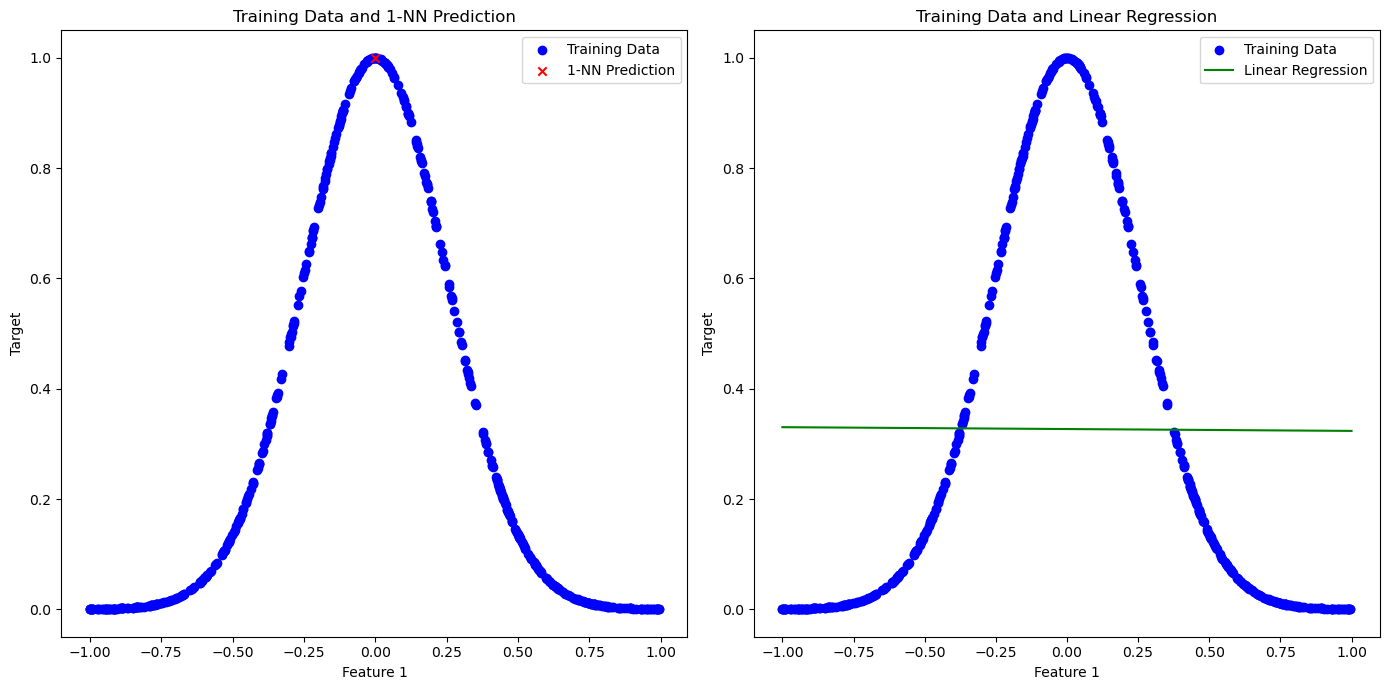

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
def generate_data(N, p):
    X = np.random.uniform(-1, 1, (N, p))
    Y = np.exp(-8 * np.linalg.norm(X, axis=1)**2)
    return X, Y

# Step 2: Implement 1-Nearest Neighbor
def one_nearest_neighbor(X_train, Y_train, x0):
    distances = np.linalg.norm(X_train - x0, axis=1)
    nearest_index = np.argmin(distances)
    return Y_train[nearest_index]

# Step 3: Implement Linear Regression using Normal Equation
def linear_regression(X_train, Y_train):
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
    XTX_inv = np.linalg.inv(X_train.T @ X_train)
    XTY = X_train.T @ Y_train
    beta = XTX_inv @ XTY
    return beta

def predict_linear_regression(X_test, beta):
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Add bias term
    return X_test @ beta

# Step 4: Plot Results and Compare
def plot_results(X_train, Y_train, X_test, Y_test, beta, x0):
    plt.figure(figsize=(14, 7))

    # Plot training data
    plt.subplot(1, 2, 1)
    plt.scatter(X_train[:, 0], Y_train, c='blue', label='Training Data')
    plt.scatter(x0[0], one_nearest_neighbor(X_train, Y_train, x0), c='red', label='1-NN Prediction', marker='x')
    plt.title('Training Data and 1-NN Prediction')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.legend()

    # Plot predictions
    X_range = np.linspace(-1, 1, 100).reshape(-1, 1)
    Y_pred_lr = predict_linear_regression(X_range, beta)

    plt.subplot(1, 2, 2)
    plt.scatter(X_train[:, 0], Y_train, c='blue', label='Training Data')
    plt.plot(X_range, Y_pred_lr, c='green', label='Linear Regression')
    plt.title('Training Data and Linear Regression')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Parameters
N = 500  # Number of training samples
p = 1    # Number of features
x0 = np.array([0])  # Query point for 1-NN

# Generate data
X_train, Y_train = generate_data(N, p)

# Perform 1-NN prediction
y0_nn = one_nearest_neighbor(X_train, Y_train, x0)

# Perform Linear Regression
beta = linear_regression(X_train, Y_train)

# Predict using Linear Regression
X_test = np.linspace(-1, 1, 100).reshape(-1, p)
Y_test = np.exp(-8 * np.linalg.norm(X_test, axis=1)**2)
Y_pred_lr = predict_linear_regression(X_test, beta)

# Plot results
plot_results(X_train, Y_train, X_test, Y_test, beta, x0)


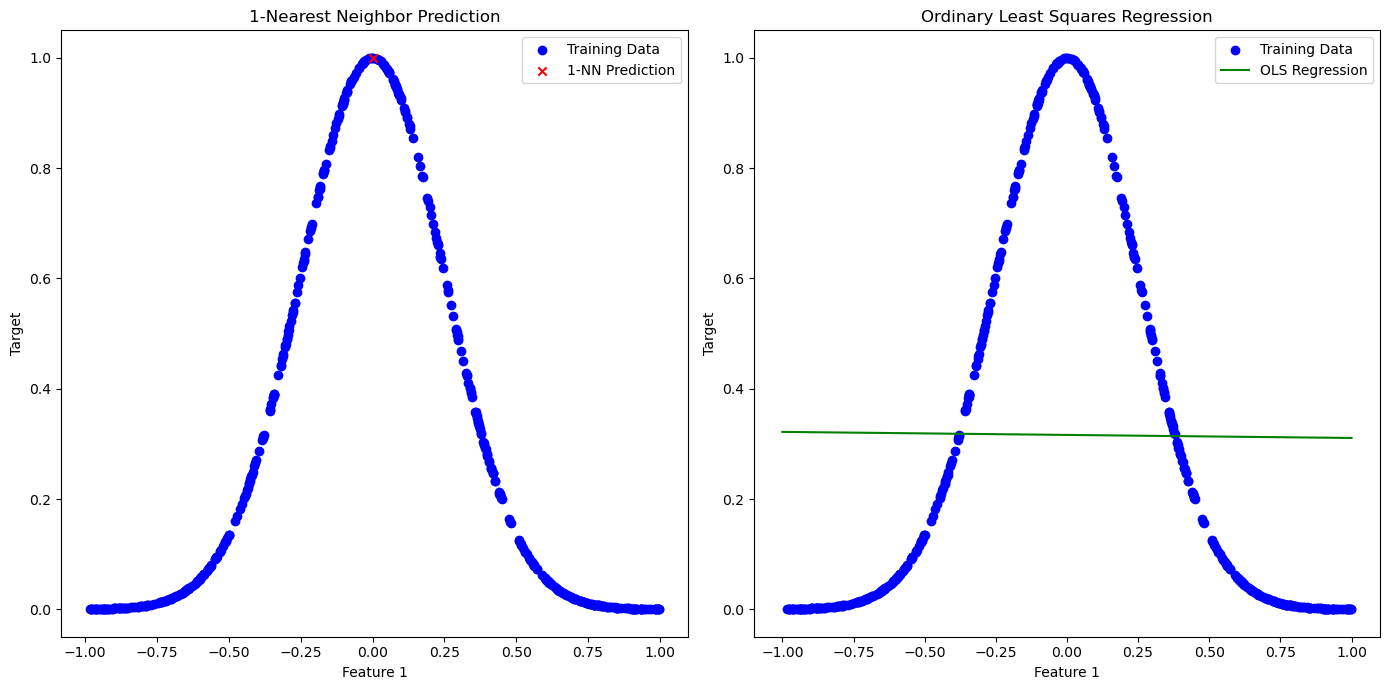

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
def generate_data(N, p):
    X = np.random.uniform(-1, 1, (N, p))
    Y = np.exp(-8 * np.linalg.norm(X, axis=1)**2)
    return X, Y

# Step 2: Implement 1-Nearest Neighbor
def one_nearest_neighbor(X_train, Y_train, x0):
    distances = np.linalg.norm(X_train - x0, axis=1)
    nearest_index = np.argmin(distances)
    return Y_train[nearest_index]

# Step 3: Implement Ordinary Least Squares (OLS) Regression
def ordinary_least_squares(X_train, Y_train):
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
    XTX_inv = np.linalg.inv(X_train.T @ X_train)
    XTY = X_train.T @ Y_train
    beta = XTX_inv @ XTY
    return beta

def predict_ols(X_test, beta):
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Add bias term
    return X_test @ beta

# Step 4: Plot and Compare Results
def plot_comparison(X_train, Y_train, X_test, Y_test, beta, x0):
    plt.figure(figsize=(14, 7))

    # Plot for 1-NN
    plt.subplot(1, 2, 1)
    plt.scatter(X_train[:, 0], Y_train, c='blue', label='Training Data')
    plt.scatter(x0[0], one_nearest_neighbor(X_train, Y_train, x0), c='red', label='1-NN Prediction', marker='x')
    plt.title('1-Nearest Neighbor Prediction')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.legend()

    # Plot for OLS
    plt.subplot(1, 2, 2)
    plt.scatter(X_train[:, 0], Y_train, c='blue', label='Training Data')
    X_range = np.linspace(-1, 1, 100).reshape(-1, 1)
    Y_pred_ols = predict_ols(X_range, beta)
    plt.plot(X_range, Y_pred_ols, c='green', label='OLS Regression')
    plt.title('Ordinary Least Squares Regression')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Parameters
N = 500  # Number of training samples
p = 1    # Number of features
x0 = np.array([0])  # Query point for 1-NN

# Generate data
X_train, Y_train = generate_data(N, p)

# Perform 1-NN prediction
y0_nn = one_nearest_neighbor(X_train, Y_train, x0)

# Perform OLS Regression
beta = ordinary_least_squares(X_train, Y_train)

# Predict using OLS Regression
X_test = np.linspace(-1, 1, 100).reshape(-1, p)
Y_test = np.exp(-8 * np.linalg.norm(X_test, axis=1)**2)

# Plot and compare results
plot_comparison(X_train, Y_train, X_test, Y_test, beta, x0)


### Generate Synthetic Data

Generates synthetic data with \( N \) samples and \( p \) features where the target \( Y \) follows an exponential decay based on the Euclidean norm of \( X \). Specifically, the target is defined as:
$$
Y = e^{-8 \|X\|^2}
$$

### 1-Nearest Neighbor (1-NN)

Finds the nearest neighbor in the training set by computing the Euclidean distance between the query point and all points in the training set. The prediction is the target value of the nearest neighbor:
$$
\hat{y}_0 = Y_{\text{nearest}}
$$

### Ordinary Least Squares (OLS) Regression

Fits a linear model to the data using the Normal Equation to determine the regression coefficients. The model is expressed as:
$$
\hat{Y} = X \beta
$$
where:
$$
\beta = (X^T X)^{-1} X^T Y
$$

### Plot and Compare Results

- The first subplot displays the training data and the prediction from the 1-NN algorithm.
- The second subplot shows the training data and the OLS regression line, illustrating how the linear model fits the data compared to 1-NN.
